In [3]:
# Georeferencing PNG from bounding box in GDAL
# https://gis.stackexchange.com/questions/429183/georeferencing-png-from-bounding-box-in-gdal

# The command below accepts as input an ungeoreferenced png file and the top left and bottom right coordinates that we want to assign to this png and returns a georeferenced tif file

# gdal.Translate('output_georef.tif','input.png', options='-a_srs EPSG:3857 -a_ullr <ulx> <uly> <lrx> <lry>') 

# https://catalyst.earth/catalyst-system-files/help/references/pciFunction_r/python/P_subproj.html
# ulx --> top, uly --> left, lrx --> bottom, lry --> right

# gdal.Translate('output_georef.tif','input.png', options='-a_srs EPSG:3857 -a_ullr top left bottom right') 

from osgeo import gdal
ds = gdal.Translate('/Users/konstantinamitsi/Documents/S2DS/DFCCU/data_source_1_maxar/maxar_sample_42tiles/2222-223_georef_asrs_aullr.tif','/Users/konstantinamitsi/Documents/S2DS/DFCCU/data_source_1_maxar/maxar_sample_42tiles/2222-223.png', options='-a_srs EPSG:3857 -a_ullr -2723607.422534087 -5206505.348164225 -2724240.703953012 -5205925.559582973') 



In [5]:
#check if the output tif is georeferenced and in the correct georeference system

gdal.Info("/Users/konstantinamitsi/Documents/S2DS/DFCCU/data_source_1_maxar/maxar_sample_42tiles/2222-223_georef_asrs_aullr.tif")

'Driver: GTiff/GeoTIFF\nFiles: /Users/konstantinamitsi/Documents/S2DS/DFCCU/data_source_1_maxar/maxar_sample_42tiles/2222-223_georef_asrs_aullr.tif\nSize is 1160, 1267\nCoordinate System is:\nPROJCRS["WGS 84 / Pseudo-Mercator",\n    BASEGEOGCRS["WGS 84",\n        ENSEMBLE["World Geodetic System 1984 ensemble",\n            MEMBER["World Geodetic System 1984 (Transit)"],\n            MEMBER["World Geodetic System 1984 (G730)"],\n            MEMBER["World Geodetic System 1984 (G873)"],\n            MEMBER["World Geodetic System 1984 (G1150)"],\n            MEMBER["World Geodetic System 1984 (G1674)"],\n            MEMBER["World Geodetic System 1984 (G1762)"],\n            MEMBER["World Geodetic System 1984 (G2139)"],\n            ELLIPSOID["WGS 84",6378137,298.257223563,\n                LENGTHUNIT["metre",1]],\n            ENSEMBLEACCURACY[2.0]],\n        PRIMEM["Greenwich",0,\n            ANGLEUNIT["degree",0.0174532925199433]],\n        ID["EPSG",4326]],\n    CONVERSION["Popular Visua

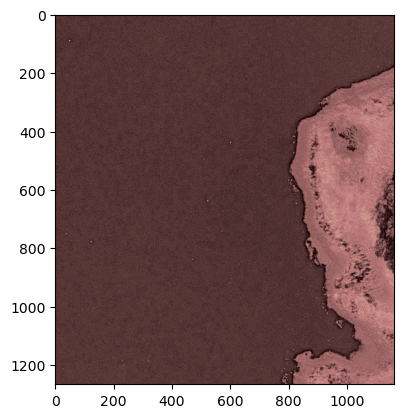

In [8]:
# Plot the georeferenced tif. If the tif is not properly georeferenced, the following error message appears "NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs."

import rasterio

from matplotlib import pyplot

src = rasterio.open("/Users/konstantinamitsi/Documents/S2DS/DFCCU/data_source_1_maxar/maxar_sample_42tiles/2222-223_georef_asrs_aullr.tif")

pyplot.imshow(src.read(1), cmap='pink')

pyplot.show()


In [4]:
#alternatively use the flags -projwin ulx uly lrx lry and -projwin_srs srs_def 
ds = gdal.Translate('/Users/konstantinamitsi/Documents/S2DS/DFCCU/data_source_1_maxar/maxar_sample_42tiles/2222-223_georef_projwin.tif','/Users/konstantinamitsi/Documents/S2DS/DFCCU/data_source_1_maxar/maxar_sample_42tiles/2222-223.png', options='-projwin_srs EPSG:3857 -projwin -2723607.422534087 -5206505.348164225 -2724240.703953012 -5205925.559582973') 

ERROR 0: -projwin_srs ignored since the dataset has no projection.
ERROR 1: Error: Computed -srcwin -2.72361e+06 -5.20651e+06 -633 580 has negative width and/or height.
